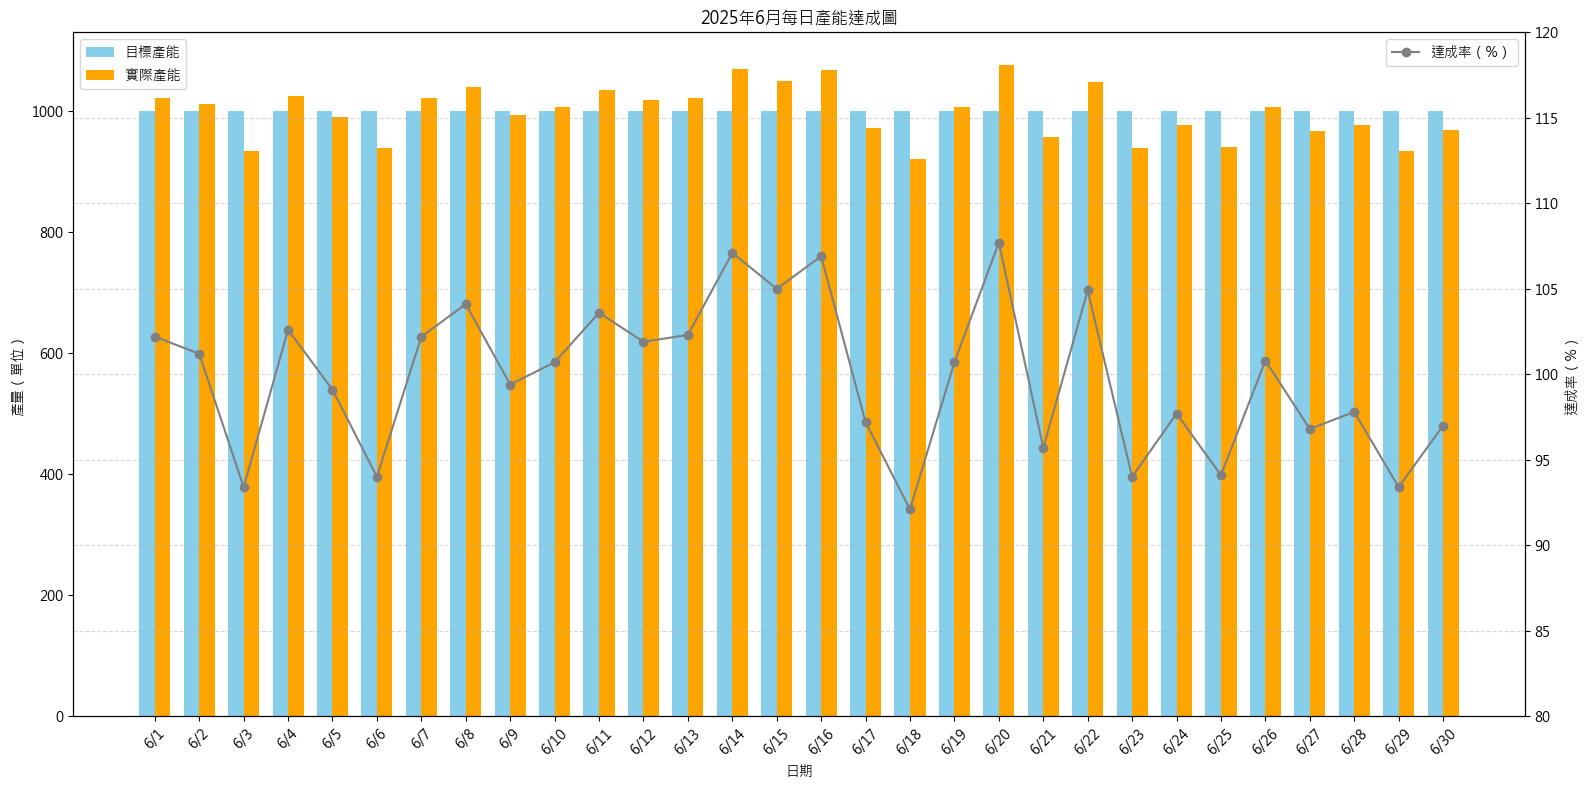

In [2]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 或使用 ['Microsoft JhengHei'] for Windows
plt.rcParams['axes.unicode_minus'] = False  # 解決負號無法顯示問題
# 模擬資料
days = [f"6/{i+1}" for i in range(30)]  # 6/1 ~ 6/30
target_output = [1000] * 30  # 每日目標固定為 1000 單位

# 模擬實際產能 (加入隨機波動)
np.random.seed(42)  # 固定亂數種子以重現結果
actual_output = [np.random.randint(920, 1080) for _ in range(30)]

# 計算達成率 (%)
achievement_rate = [a / t * 100 for a, t in zip(actual_output, target_output)]

# 畫圖
x = np.arange(len(days))
width = 0.35

fig, ax1 = plt.subplots(figsize=(16, 8))

# 柱狀圖
ax1.bar(x - width/2, target_output, width, label='目標產能', color='skyblue')
ax1.bar(x + width/2, actual_output, width, label='實際產能', color='orange')
ax1.set_ylabel('產量（單位）')
ax1.set_xlabel('日期')
ax1.set_title('2025年6月每日產能達成圖')
ax1.set_xticks(x)
ax1.set_xticklabels(days, rotation=45)
ax1.legend(loc='upper left')

# 折線圖
ax2 = ax1.twinx()
ax2.plot(x, achievement_rate, color='gray', marker='o', label='達成率（%）')
ax2.set_ylabel('達成率（%）')
ax2.set_ylim(80, 120)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [4]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor

# 建立簡報
prs = Presentation()

# 新增投影片（空白版面）
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)

# 標題
title_shape = slide.shapes.title
title_shape.text = "員工請假紀錄（ERP系統範例）"

# 請假資料
data = [
    ["員工編號", "姓名", "部門", "假別", "開始日", "結束日", "狀態"],
    ["0001", "吳建宏", "HR", "病假", "2025/06/01", "2025/06/03", "已核准"],
    ["0002", "張雅婷", "行銷", "特休", "2025/06/04", "2025/06/05", "審核中"],
    ["0003", "陳冠廷", "IT", "事假", "2025/06/02", "2025/06/02", "已駁回"],
    ["0004", "李珮甄", "業務", "婚假", "2025/06/10", "2025/06/12", "已核准"],
    ["0005", "王志明", "客服", "產假", "2025/06/15", "2025/06/30", "已核准"]
]

# 建立表格大小及位置
rows = len(data)
cols = len(data[0])
left = Inches(0.5)
top = Inches(1.5)
width = Inches(9)
height = Inches(2)

table = slide.shapes.add_table(rows, cols, left, top, width, height).table

# 設定欄寬
col_widths = [Inches(1.1), Inches(1.2), Inches(1), Inches(1), Inches(1.3), Inches(1.3), Inches(1)]
for i, width in enumerate(col_widths):
    table.columns[i].width = width

# 填入資料 & 格式
for row_idx, row_data in enumerate(data):
    for col_idx, val in enumerate(row_data):
        cell = table.cell(row_idx, col_idx)
        cell.text = val

        # 標題列加粗及底色
        if row_idx == 0:
            for paragraph in cell.text_frame.paragraphs:
                for run in paragraph.runs:
                    run.font.bold = True
                    run.font.size = Pt(12)
                    run.font.color.rgb = RGBColor(255, 255, 255)
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(0, 51, 102)  # 深藍色
            cell.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER
        else:
            # 內容置中
            cell.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

# 儲存檔案
prs.save("員工請假紀錄_範例.pptx")
print("PPT檔案已生成：員工請假紀錄_範例.pptx")




PPT檔案已生成：員工請假紀錄_範例.pptx
